In [ ]:
## Bibliothèques générales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

"""## Bibliothèques de cartographie et d'analyse spatiale
import geopandas as gpd
import folium
from folium import plugins

## API de données
import wbgapi as wb"""

"## Bibliothèques de cartographie et d'analyse spatiale\nimport geopandas as gpd\nimport folium\nfrom folium import plugins\n\n## API de données\nimport wbgapi as wb"

In [ ]:
import os
import zipfile
from google.colab import files

# Téléversement du fichier ZIP
print("➡️ Téléversez le fichier ZIP contenant les fichiers .xlsx…")
zip_filename = list(files.upload().keys())[0]

# Extraction du ZIP
input_dir = "extracted_files"
os.makedirs(input_dir, exist_ok=True)
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(input_dir)

# Liste des fichiers Excel extraits
excel_files = [
    os.path.join(root, file)
    for root, _, files_ in os.walk(input_dir)
    for file in files_
    if file.lower().endswith(".xlsx")
]

if not excel_files:
    raise Exception("❌ Aucun fichier .xlsx trouvé dans le dossier.")

# Liste pour stocker les DataFrames extraits
dfs = []

# Parcours des fichiers Excel
for file_path in excel_files:
    # Chargement du fichier Excel
    df = pd.read_excel(file_path)

    # Vérifier que les colonnes existent, sinon ignorer le fichier
    cols_to_select = ["Pays", "PMID", "Date", "Pays_detectés"]
    if all(col in df.columns for col in cols_to_select):
        # Sélection des colonnes
        df_selected = df[cols_to_select]
        dfs.append(df_selected)
    else:
        print(f"⚠️ Fichier {file_path} ignoré car il ne contient pas toutes les colonnes requises.")

# Fusion de tous les DataFrames en un seul
merged_df = pd.concat(dfs, ignore_index=True)
# Affichage ou sauvegarde du résultat
print(merged_df.sample(5))



➡️ Téléversez le fichier ZIP contenant les fichiers .xlsx…


Saving resultat_analyse.zip to resultat_analyse (1).zip
              Pays      PMID        Date  \
2123      Cameroon  27530488  2016/08/18   
2003      Cameroon  33983976  2021/05/14   
109   Burkina Faso  35206252  2022/02/26   
874       Cameroon  17137845  2006/12/02   
236   Burkina Faso  38501305  2024/03/19   

                                     Pays_detectés  
2123                                      Cameroon  
2003                                      Cameroon  
109   Burkina Faso; Canada; Senegal; United States  
874                                       Cameroon  
236                    Burkina Faso; United States  


In [ ]:
data=merged_df.copy()

In [ ]:
#%pip install pycountry

In [ ]:
#import pycountry
#for country in pycountry.countries:
    #print(country.name)

uploaded = files.upload()  # Choisir le fichier .xlsx depuis l'interface

# Extraire le nom du fichier uploadé
filename = list(uploaded.keys())[0]

# Charger le fichier Excel
list_country = pd.read_excel(filename)


Saving liste_de_pays.xlsx to liste_de_pays (11).xlsx


In [ ]:
country_name=[country for country in list_country['pays']]


In [ ]:
for name in country_name:
    data[name] = 0




NameError: name 'country_name' is not defined

In [ ]:
data.head(3)

,Pays,PMID,Date,Pays_detectés,Afghanistan,South Africa,Albania,Algeria,Germany,Andorra,...,Tuvalu,Ukraine,Uruguay,Vanuatu,Holy See,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,Burkina Faso,35076409,2022/01/26,Burkina Faso; Germany; Italy; Kenya; South Africa,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Burkina Faso,35710849,2022/06/18,Austria; Burkina Faso; Canada; France; Gabon; ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Burkina Faso,39141163,2024/08/14,Burkina Faso; United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for index, row in data.iterrows():
    cell = row["Pays_detectés"]

    if pd.isna(cell):  # Si la cellule est vide (NaN), on la saute
        continue

    detected = cell.split(";")
    for country in detected:
        country = country.strip()
        # Vérifie si 'country' est une colonne ET que ce pays est différent du pays de la ligne dans la colonne 'Pays'
        if country in data.columns and country != row['Pays']:
            data.at[index, country] += 1

In [ ]:
data['PMID'] = data['PMID'].astype(str).apply(lambda x: f'"{x}"')
data

,Pays,PMID,Date,Pays_detectés,Afghanistan,South Africa,Albania,Algeria,Germany,Andorra,...,Tuvalu,Ukraine,Uruguay,Vanuatu,Holy See,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,Burkina Faso,"""35076409""",2022/01/26,Burkina Faso; Germany; Italy; Kenya; South Africa,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Burkina Faso,"""35710849""",2022/06/18,Austria; Burkina Faso; Canada; France; Gabon; ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Burkina Faso,"""39141163""",2024/08/14,Burkina Faso; United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Burkina Faso,"""38870214""",2024/06/13,Burkina Faso; France; Switzerland; Uganda,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Burkina Faso,"""36108049""",2022/09/16,Algeria; Angola; Benin; Botswana; Brazil; Burk...,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,Burundi,"""32782524""",2020/08/13,Brazil; Burundi; China; India; South Africa; U...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,Burundi,"""34402985""",2021/08/18,Belgium; Burundi; Malawi; Rwanda; Tanzania,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,Burundi,"""31131993""",2019/05/28,Austria; Burundi; China; Ethiopia; Kenya; Tanz...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2544,Burundi,"""39421954""",2024/10/18,Belgium; Burundi; Canada; Congo; Sweden; Unite...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data


,Pays,PMID,Date,Pays_detectés,Afghanistan,South Africa,Albania,Algeria,Germany,Andorra,...,Tuvalu,Ukraine,Uruguay,Vanuatu,Holy See,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,Burkina Faso,"""35076409""",2022/01/26,Burkina Faso; Germany; Italy; Kenya; South Africa,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Burkina Faso,"""35710849""",2022/06/18,Austria; Burkina Faso; Canada; France; Gabon; ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Burkina Faso,"""39141163""",2024/08/14,Burkina Faso; United Kingdom,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Burkina Faso,"""38870214""",2024/06/13,Burkina Faso; France; Switzerland; Uganda,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Burkina Faso,"""36108049""",2022/09/16,Algeria; Angola; Benin; Botswana; Brazil; Burk...,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,Burundi,"""32782524""",2020/08/13,Brazil; Burundi; China; India; South Africa; U...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,Burundi,"""34402985""",2021/08/18,Belgium; Burundi; Malawi; Rwanda; Tanzania,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,Burundi,"""31131993""",2019/05/28,Austria; Burundi; China; Ethiopia; Kenya; Tanz...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2544,Burundi,"""39421954""",2024/10/18,Belgium; Burundi; Canada; Congo; Sweden; Unite...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data["Total_ligne"] = data.iloc[:, 3:].sum(axis=1, numeric_only=True)
data.loc["Total_colonne"] = data.sum(numeric_only=True, axis=0)

<ipython-input-15-f2216045f5f3>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["Total_ligne"] = data.iloc[:, 3:].sum(axis=1, numeric_only=True)


In [ ]:
data

,Pays,PMID,Date,Pays_detectés,Afghanistan,South Africa,Albania,Algeria,Germany,Andorra,...,Ukraine,Uruguay,Vanuatu,Holy See,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Total_ligne
0,Burkina Faso,"""35076409""",2022/01/26,Burkina Faso; Germany; Italy; Kenya; South Africa,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Burkina Faso,"""35710849""",2022/06/18,Austria; Burkina Faso; Canada; France; Gabon; ...,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,Burkina Faso,"""39141163""",2024/08/14,Burkina Faso; United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Burkina Faso,"""38870214""",2024/06/13,Burkina Faso; France; Switzerland; Uganda,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Burkina Faso,"""36108049""",2022/09/16,Algeria; Angola; Benin; Botswana; Brazil; Burk...,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,Burundi,"""34402985""",2021/08/18,Belgium; Burundi; Malawi; Rwanda; Tanzania,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2543,Burundi,"""31131993""",2019/05/28,Austria; Burundi; China; Ethiopia; Kenya; Tanz...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2544,Burundi,"""39421954""",2024/10/18,Belgium; Burundi; Canada; Congo; Sweden; Unite...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2545,Burundi,"""39236112""",2024/09/05,Argentina; Brazil; Burundi; Cameroon; Congo; E...,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


In [ ]:

colonnes_fixes = ["Pays", "PMID"] # liste des colonnes à toujours garder
colonnes_utiles = colonnes_fixes + data.columns[data.loc["Total_colonne"] > 0].tolist()

data_filtré = data.loc[:, colonnes_utiles]


In [ ]:
data_filtré

,Pays,PMID,Afghanistan,South Africa,Albania,Algeria,Germany,Angola,Saudi Arabia,Argentina,...,Trinidad and Tobago,Tunisia,Turkey,Ukraine,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Total_ligne
0,Burkina Faso,"""35076409""",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Burkina Faso,"""35710849""",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,Burkina Faso,"""39141163""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Burkina Faso,"""38870214""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Burkina Faso,"""36108049""",0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,Burundi,"""34402985""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2543,Burundi,"""31131993""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2544,Burundi,"""39421954""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2545,Burundi,"""39236112""",0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


In [ ]:
data_filtré

,Pays,PMID,Afghanistan,South Africa,Albania,Algeria,Germany,Angola,Saudi Arabia,Argentina,...,Trinidad and Tobago,Tunisia,Turkey,Ukraine,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Total_ligne
0,Burkina Faso,"""35076409""",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Burkina Faso,"""35710849""",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,Burkina Faso,"""39141163""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Burkina Faso,"""38870214""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Burkina Faso,"""36108049""",0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,Burundi,"""34402985""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2543,Burundi,"""31131993""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2544,Burundi,"""39421954""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2545,Burundi,"""39236112""",0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0


In [ ]:
# Regrouper par pays et faire la somme
data_final = data_filtré.groupby("Pays").sum()

In [ ]:
data_final.loc["Total_colonne"] = data.sum(numeric_only=True, axis=0)


In [ ]:
data_final

,PMID,Afghanistan,South Africa,Albania,Algeria,Germany,Angola,Saudi Arabia,Argentina,Armenia,...,Trinidad and Tobago,Tunisia,Turkey,Ukraine,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Total_ligne
Pays,,,,,,,,,,,,,,,,,,,,,
Burkina Faso,"""35076409""""35710849""""39141163""""38870214""""36108...",0.0,73.0,1.0,8.0,68.0,7.0,4.0,3.0,0.0,...,0.0,6.0,5.0,0.0,1.0,11.0,1.0,30.0,17.0,2524.0
Burundi,"""39304265""""36108049""""39421956""""25709727""""38096...",0.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,109.0
Cabo Verde,"""33689039""""36108049""""35567284""""29637009""""35810...",1.0,1.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,3.0,1.0,0.0,1.0,3.0,2.0,306.0
Cameroon,"""33167496""""38757747""""37957379""""36343475""""29845...",2.0,250.0,2.0,13.0,128.0,11.0,26.0,18.0,3.0,...,3.0,11.0,11.0,10.0,2.0,27.0,3.0,38.0,41.0,5095.0
Total_colonne,NaN,6.0,654.0,8.0,46.0,404.0,42.0,62.0,46.0,8.0,...,8.0,40.0,34.0,26.0,8.0,76.0,10.0,144.0,122.0,16068.0


In [ ]:
# Trier les colonnes selon la valeur dans la ligne "Total_colonne" (du plus grand au plus petit)
colonnes_top10 = data_final.loc["Total_colonne"].sort_values(ascending=False).head(10).index

# Garder uniquement ces 10 colonnes dans data_final
data_final_top10 = data_final[colonnes_top10]




In [ ]:
data_final_top10 = data_final_top10.drop(index="Total_colonne")


In [ ]:
data_final_top=data_final_top10.drop("Total_ligne", axis=1)



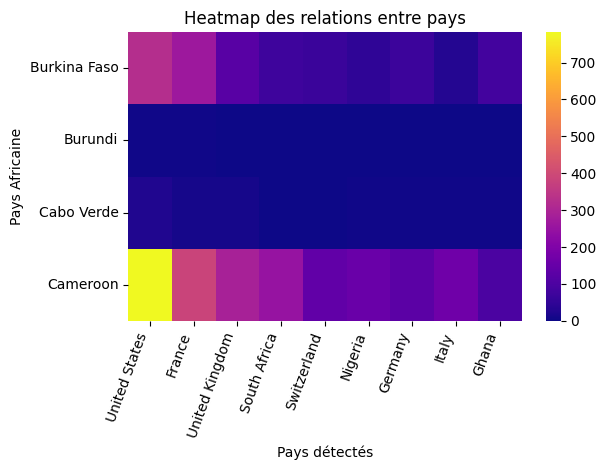

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(20, 25))  # taille figure ajustée

sns.heatmap(data_final_top,
            annot=False,         # ne pas afficher les valeurs dans les cases
            fmt=".0f",
            cmap="plasma",      # palette de couleurs
            linewidths=0,     # fine ligne entre cases
            linecolor="white",  # couleur de la ligne entre cases
            cbar=True)          # afficher la barre de couleur

plt.title("Heatmap des relations entre pays")
plt.xlabel("Pays détectés")
plt.ylabel("Pays Africaine")

plt.xticks(rotation=70, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
 import pycountry
import pandas as pd

# Supposons que list_country["pays"] est une colonne d'un DataFrame list_country
pays_utilisateur = list_country["pays"].unique().tolist()

# Récupérer la liste officielle des noms de pays via pycountry
pays_pycountry = [country.name for country in pycountry.countries]

# Trouver les pays de ta liste qui ne sont pas dans pycountry
pays_non_reconnus = [p for p in pays_utilisateur if p not in pays_pycountry]

print("Pays non reconnus par pycountry :")
print(pays_non_reconnus)

Pays non reconnus par pycountry :
['Bolivia', 'Brunei', 'Cape Verde', 'North Korea', 'South Korea', 'Ivory Coast', 'Iran', 'Laos', 'Micronesia', 'Moldova', 'Russia', 'Syria', 'Tanzania', 'East Timor', 'Turkey', 'Holy See', 'Venezuela', 'Vietnam']


In [ ]:
%pip install rapidfuzz
%pip install countryinfo



In [ ]:
import pycountry
from rapidfuzz import process, fuzz
import pandas as pd
from countryinfo import CountryInfo

# Exemple DataFrame list_country
# list_country = pd.DataFrame({'pays': [...]})

# Dictionnaire noms officiels pycountry
pays_pycountry = {country.name: country.alpha_2 for country in pycountry.countries}

def get_official_name(pays_nom):
    # Trouve la meilleure correspondance avec fuzzy matching
    meilleur_match, score, _ = process.extractOne(pays_nom, pays_pycountry.keys(), scorer=fuzz.ratio)
    return meilleur_match if score > 70 else None

def get_capital(name_pycountry):
    if not name_pycountry:
        return None
    try:
        c = CountryInfo(name_pycountry)
        return c.capital()
    except Exception:
        return None

def enrichir_pays(df):
    df['name_pycountry'] = df['pays'].apply(get_official_name)
    df['capital'] = df['name_pycountry'].apply(get_capital)
    return df

# Application
list_country = enrichir_pays(list_country)

print(list_country.head())


           pays                pays_variants name_pycountry   capital
0   Afghanistan                  afghanistan    Afghanistan     Kabul
1  South Africa  afrique du sud,south africa   South Africa  Pretoria
2       Albania              albanie,albania        Albania    Tirana
3       Algeria              algérie,algeria        Algeria   Algiers
4       Germany        allemagne,germany,deu        Germany    Berlin


In [ ]:
#%pip install basemap
from mpl_toolkits.basemap import Basemap

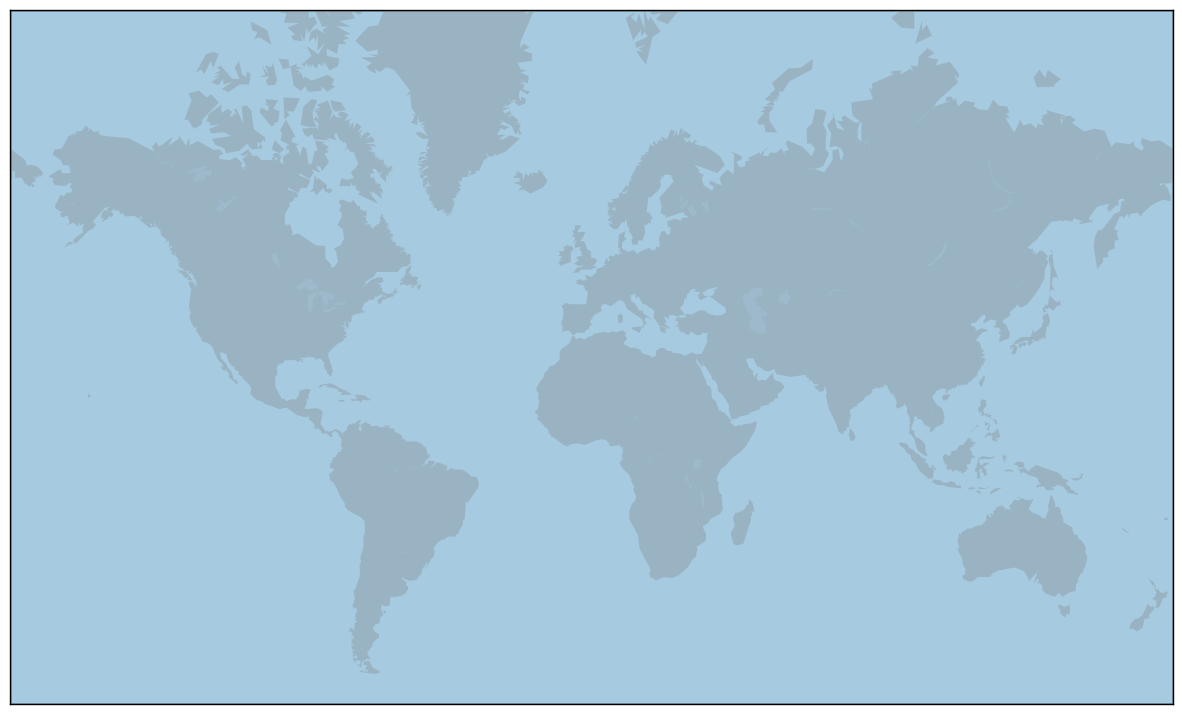

In [ ]:
# merc
m=Basemap(llcrnrlon=-180, llcrnrlat=-60,urcrnrlon=180,urcrnrlat=80, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0')
m.fillcontinents(color='grey', alpha=0.3)
plt.show()

Cabo Verde: (-24.0083947, 16.0000552)


Burkina Faso: (-1.6880314, 12.0753083)


South Africa: (24.991639, -28.8166236)
Cameroon: (13.1535811, 4.6125522)


Albania: (19.9999619, 41.000028)
Burundi: (29.9324519, -3.426449)


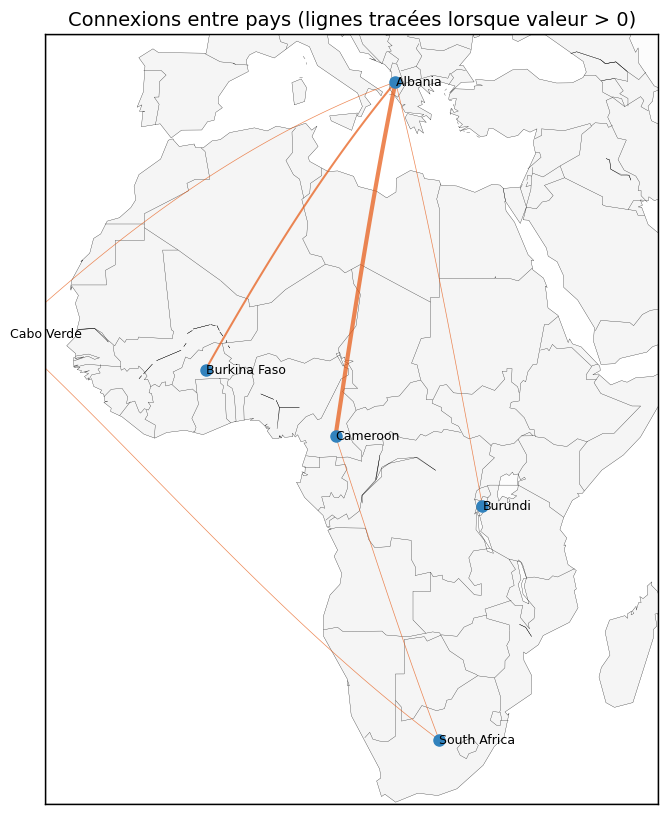

In [ ]:
# libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Configuration
plt.figure(figsize=(14, 10))
geolocator = Nominatim(user_agent="country_connections")

# Données du tableau
data = {
    'Pays': ['Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon'],
    'South Africa': [0.0, 0.0, 1.0, 2.0],
    'Albania': [73.0, 3.0, 1.0, 250.0]
}
df = pd.DataFrame(data)

# Fonction pour obtenir les coordonnées d'un pays
def get_country_coords(country_name):
    try:
        location = geolocator.geocode(country_name)
        if location:
            return location.longitude, location.latitude
        return None
    except GeocoderTimedOut:
        return get_country_coords(country_name)

# Dictionnaire pour stocker les coordonnées
country_coords = {}

# Récupération des coordonnées pour tous les pays uniques
all_countries = set(df['Pays']).union(set(df.columns[1:]))
for country in all_countries:
    if country not in country_coords:
        coords = get_country_coords(country)
        if coords:
            country_coords[country] = coords
            print(f"{country}: {coords}")
        else:
            print(f"Coordonnées non trouvées pour {country}")

# Création de la carte
m = Basemap(llcrnrlon=-20, llcrnrlat=-35, urcrnrlon=50, urcrnrlat=45, projection='merc')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.2, color="black")
m.drawcountries(linewidth=0.2, color="black")

# Tracer les connexions
for _, row in df.iterrows():
    source_country = row['Pays']
    if source_country not in country_coords:
        continue

    for target_country in df.columns[1:]:
        value = row[target_country]
        if value > 0 and target_country in country_coords:
            start_lon, start_lat = country_coords[source_country]
            end_lon, end_lat = country_coords[target_country]

            # Ajuster l'épaisseur en fonction de la valeur (min 0.5, max 3)
            linewidth = max(0.5, min(3, value/50))

            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat,
                            linewidth=linewidth, color='#e6550d', alpha=0.7)

# Ajouter les points et noms des pays
for country, (lon, lat) in country_coords.items():
    x, y = m(lon, lat)
    m.plot(x, y, 'o', markersize=8, color='#3182bd')
    plt.text(x, y, country, fontsize=9, ha='left', va='center')

plt.title("Connexions entre pays (lignes tracées lorsque valeur > 0)", fontsize=14)
plt.show()

KeyError: "['Albania'] not in index"

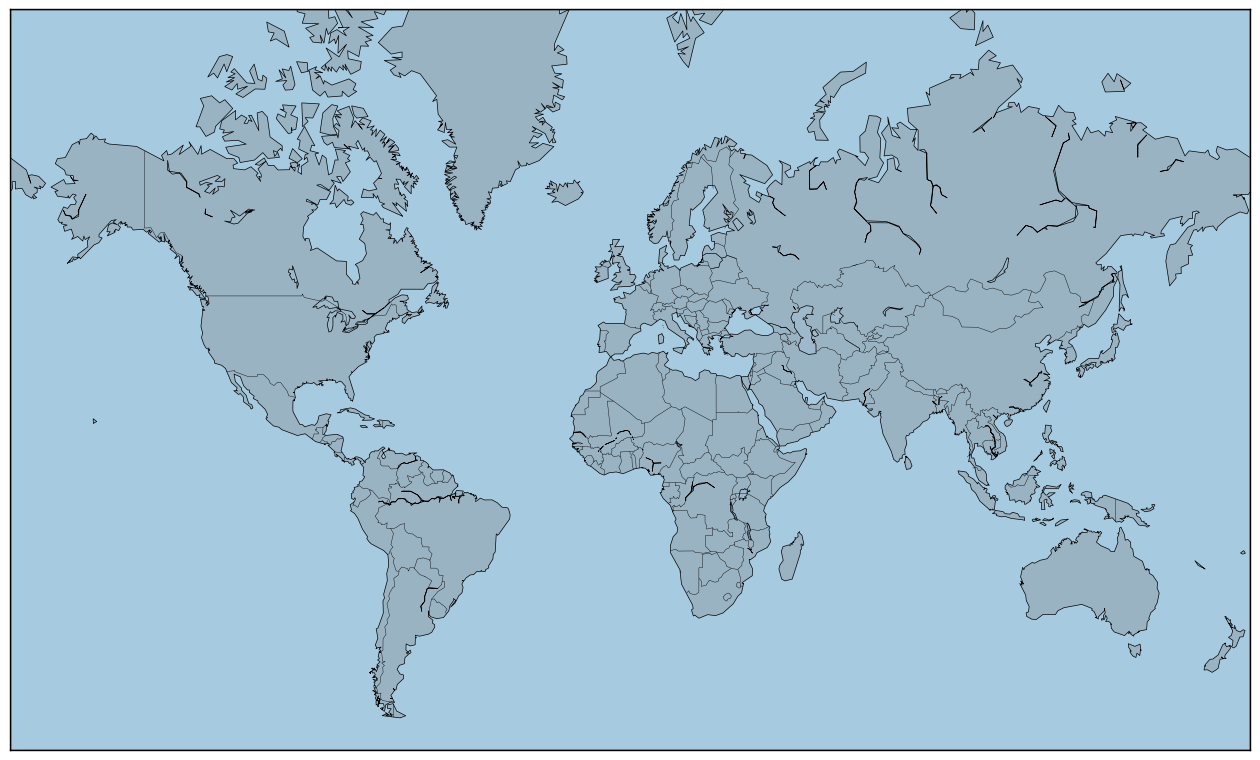

In [ ]:
# libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import numpy as np

# Configuration
plt.figure(figsize=(16, 12))
geolocator = Nominatim(user_agent="country_connections")

# Données du tableau
"""data = {
    'Pays': ['Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon'],
    'South Africa': [0.0, 0.0, 1.0, 2.0],
    'Albania': [73.0, 3.0, 1.0, 250.0]
}"""
df = data_final_top

# Fonction pour obtenir les coordonnées avec gestion d'erreur
def get_country_coords(country_name):
    try:
        location = geolocator.geocode(country_name)
        return (location.longitude, location.latitude) if location else (None, None)
    except GeocoderTimedOut:
        return get_country_coords(country_name)

# Dictionnaire des coordonnées (avec quelques valeurs par défaut pour la démo)
"""country_coords = {
    'Burkina Faso': (-1.7546, 12.2383),
    'Burundi': (29.9189, -3.3731),
    'Cabo Verde': (-23.6052, 15.1201),
    'Cameroon': (12.3547, 7.3697),
    'South Africa': (22.9375, -30.5595),
    'Albania': (20.1683, 41.1533)
}"""

# Création de la carte avec votre configuration Mercator
m = Basemap(llcrnrlon=-180, llcrnrlat=-60, urcrnrlon=180, urcrnrlat=80, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0')
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.3)

# Normalisation des valeurs pour l'échelle des lignes
values = df[['South Africa', 'Albania']].values.flatten()
max_value = max(values[values > 0]) if any(values > 0) else 1

# Tracer les connexions avec style amélioré
for _, row in df.iterrows():
    source = row['Pays']
    if source not in country_coords:
        continue

    for target in ['South Africa', 'Albania']:
        value = row[target]
        if value > 0 and target in country_coords:
            # Coordonnées
            start_lon, start_lat = country_coords[source]
            end_lon, end_lat = country_coords[target]

            # Style dynamique
            linewidth = 0.5 + 2.5 * (value/max_value)  # Épaisseur 0.5-3
            alpha = 0.4 + 0.6 * (value/max_value)      # Transparence 0.4-1

            # Tracé de la ligne avec interpolation courbe
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat,
                            linewidth=linewidth, color='#FF6B6B', alpha=alpha,
                            zorder=5)

# Ajout des marqueurs et labels
for country, (lon, lat) in country_coords.items():
    x, y = m(lon, lat)
    m.plot(x, y, 'o', markersize=8, color='#4ECDC4', markeredgecolor='white', zorder=10)
    offset = 500000  # Décalage en mètres
    plt.text(x+offset, y+offset, country,
             fontsize=9, color='#292F36',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2),
             zorder=10)

# Ajout d'une légende
plt.title("Connexions entre pays (épaisseur proportionnelle à la valeur)\n",
          fontsize=14, pad=20)

# Afficher la carte
plt.tight_layout()
plt.show()

In [ ]:
data_final_top = data_final_top.reset_index()


In [ ]:
data_final_top

,Pays,United States,France,United Kingdom,South Africa,Switzerland,Nigeria,Germany,Italy,Ghana
0,Burkina Faso,323.0,263.0,122.0,73.0,67.0,46.0,68.0,29.0,82.0
1,Burundi,4.0,4.0,2.0,3.0,2.0,1.0,1.0,0.0,1.0
2,Cabo Verde,23.0,12.0,12.0,1.0,3.0,5.0,5.0,4.0,5.0
3,Cameroon,782.0,383.0,288.0,250.0,140.0,155.0,128.0,168.0,96.0


Coordonnées trouvées pour Burkina Faso: (-1.6880314, 12.0753083)
Coordonnées trouvées pour Switzerland: (8.2319736, 46.7985624)
Coordonnées trouvées pour United Kingdom: (-3.2765753, 54.7023545)
Coordonnées trouvées pour Italy: (12.674297, 42.6384261)
Coordonnées trouvées pour France: (1.8883335, 46.603354)
Coordonnées trouvées pour Cabo Verde: (-24.0083947, 16.0000552)
Coordonnées trouvées pour United States: (-100.445882, 39.7837304)
Coordonnées trouvées pour South Africa: (24.991639, -28.8166236)
Coordonnées trouvées pour Cameroon: (13.1535811, 4.6125522)
Coordonnées trouvées pour Nigeria: (7.9999721, 9.6000359)
Coordonnées trouvées pour Ghana: (-1.0800271, 8.0300284)
Coordonnées trouvées pour Burundi: (29.9324519, -3.426449)
Coordonnées trouvées pour Germany: (10.4478313, 51.1638175)


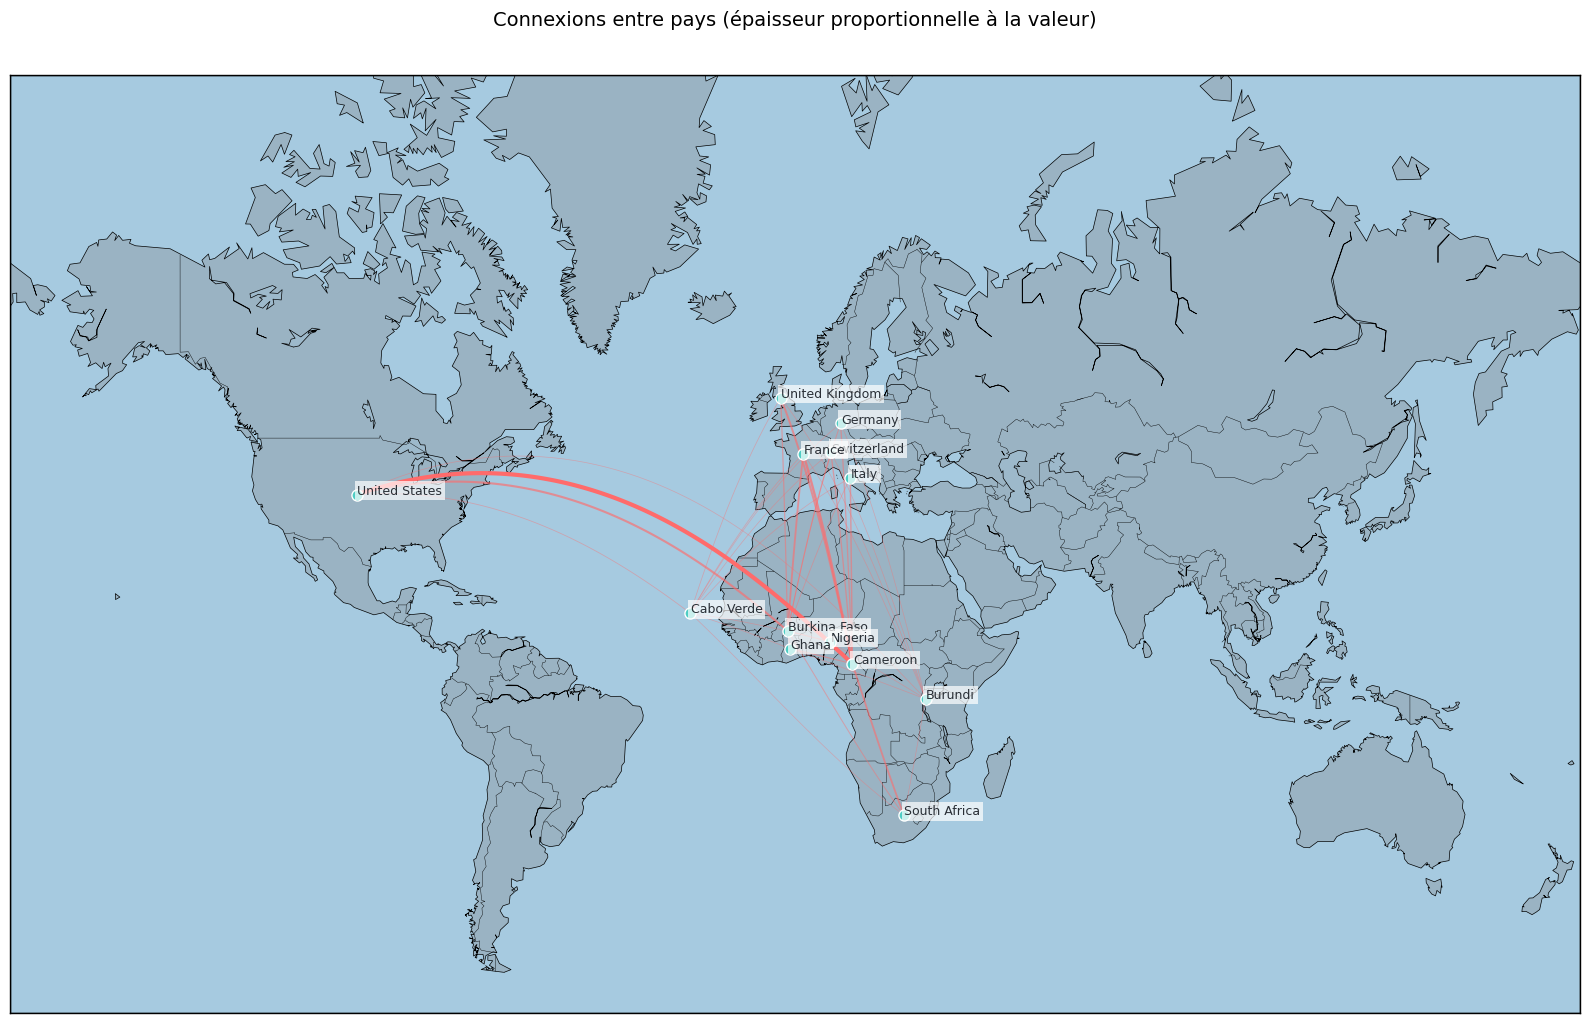

In [ ]:
# libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import numpy as np
import time

# Configuration
plt.figure(figsize=(16, 12))

# Initialisation du géocodeur avec timeout augmenté
geolocator = Nominatim(user_agent="country_connections", timeout=10)

# Exemple de DataFrame (remplace par ton vrai DataFrame)
data =data_final_top
df = pd.DataFrame(data)

# Fonction améliorée pour obtenir les coordonnées
def get_country_coords(country_name, max_retries=3):
    retry_count = 0
    while retry_count < max_retries:
        try:
            location = geolocator.geocode(country_name)
            if location:
                print(f"Coordonnées trouvées pour {country_name}: ({location.longitude}, {location.latitude})")
                return (location.longitude, location.latitude)
            else:
                print(f"Aucun résultat pour {country_name}")
                return None
        except (GeocoderTimedOut, GeocoderUnavailable) as e:
            print(f"Erreur pour {country_name} (tentative {retry_count + 1}): {str(e)}")
            retry_count += 1
            time.sleep(2)
    return None

# Récupération des coordonnées pour tous les pays uniques (index + colonnes sauf 'Pays')
all_countries = set(df['Pays']).union(set(df.columns[1:]))
country_coords = {}

for country in all_countries:
    if country not in country_coords:
        coords = get_country_coords(country)
        if coords:
            country_coords[country] = coords
        else:
            print('error')
            country_coords[country] = default_coords
            print(f"Utilisation des coordonnées par défaut pour {country}")

# Création de la carte Mercator
m = Basemap(llcrnrlon=-180, llcrnrlat=-60, urcrnrlon=180, urcrnrlat=80, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0')
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.3)

# Normalisation des valeurs pour épaisseur des lignes
values = df[df.columns[1:]].values.flatten()
values = values[values > 0]
max_value = max(values) if len(values) > 0 else 1

# Tracer les connexions
for _, row in df.iterrows():
    source = row['Pays']
    if source not in country_coords:
        continue
    for target in df.columns[1:]:
        value = row[target]
        if value > 0 and target in country_coords:
            start_lon, start_lat = country_coords[source]
            end_lon, end_lat = country_coords[target]

            linewidth = 0.5 + 2.5 * (value / max_value)
            alpha = 0.4 + 0.6 * (value / max_value)

            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat,
                              linewidth=linewidth, color='#FF6B6B', alpha=alpha, zorder=5)

# Ajout des marqueurs et labels
for country, (lon, lat) in country_coords.items():
    x, y = m(lon, lat)
    m.plot(x, y, 'o', markersize=8, color='#4ECDC4', markeredgecolor='white', zorder=10)
    # Décalage plus raisonnable pour le texte (en pixels)
    plt.text(x + 10000, y + 10000, country,
             fontsize=9, color='#292F36',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2),
             zorder=10)

plt.title("Connexions entre pays (épaisseur proportionnelle à la valeur)\n", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


Coordonnées trouvées pour Burkina Faso: (-1.6880314, 12.0753083)
Coordonnées trouvées pour Switzerland: (8.2319736, 46.7985624)
Coordonnées trouvées pour United Kingdom: (-3.2765753, 54.7023545)
Coordonnées trouvées pour Italy: (12.674297, 42.6384261)
Coordonnées trouvées pour France: (1.8883335, 46.603354)
Coordonnées trouvées pour Cabo Verde: (-24.0083947, 16.0000552)
Coordonnées trouvées pour United States: (-100.445882, 39.7837304)
Coordonnées trouvées pour South Africa: (24.991639, -28.8166236)
Coordonnées trouvées pour Cameroon: (13.1535811, 4.6125522)
Coordonnées trouvées pour Nigeria: (7.9999721, 9.6000359)
Coordonnées trouvées pour Ghana: (-1.0800271, 8.0300284)
Coordonnées trouvées pour Burundi: (29.9324519, -3.426449)
Coordonnées trouvées pour Germany: (10.4478313, 51.1638175)


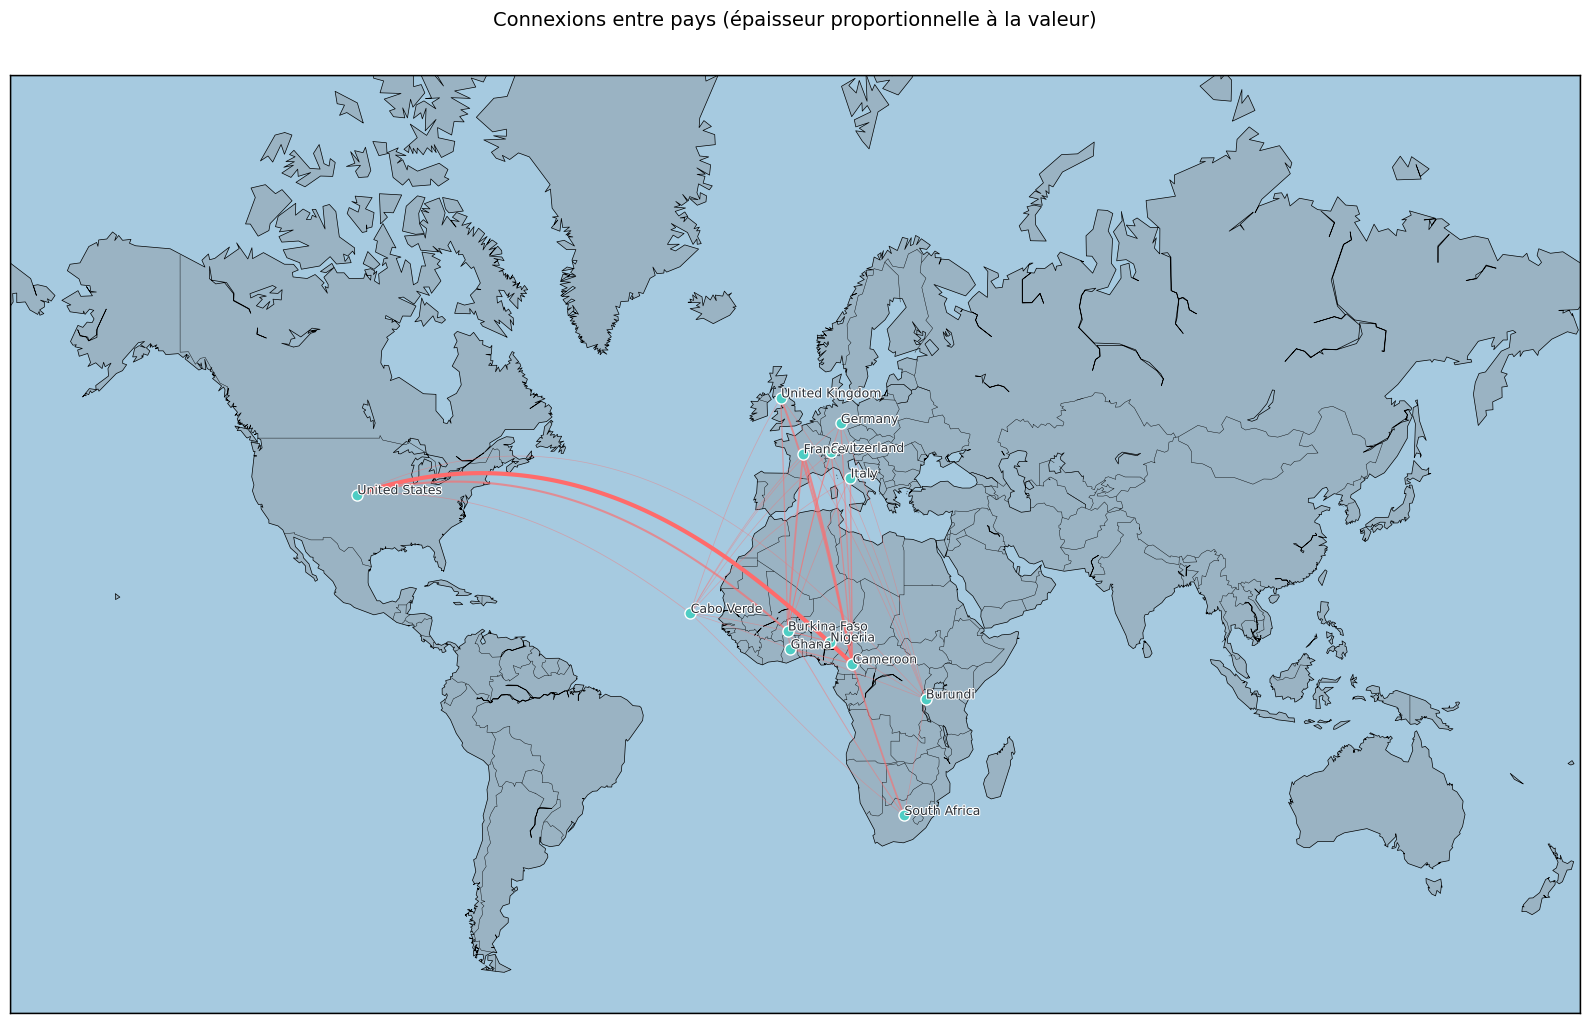

In [ ]:
# libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import numpy as np
import time

# Configuration
plt.figure(figsize=(16, 12))

# Initialisation du géocodeur avec timeout augmenté
geolocator = Nominatim(user_agent="country_connections", timeout=10)

# Exemple de DataFrame (remplace par ton vrai DataFrame)
data = data_final_top

# Fonction améliorée pour obtenir les coordonnées
def get_country_coords(country_name, max_retries=3):
    retry_count = 0
    while retry_count < max_retries:
        try:
            location = geolocator.geocode(country_name)
            if location:
                print(f"Coordonnées trouvées pour {country_name}: ({location.longitude}, {location.latitude})")
                return (location.longitude, location.latitude)
            else:
                print(f"Aucun résultat pour {country_name}")
                return None
        except (GeocoderTimedOut, GeocoderUnavailable) as e:
            print(f"Erreur pour {country_name} (tentative {retry_count + 1}): {str(e)}")
            retry_count += 1
            time.sleep(2)
    return None

# Récupération des coordonnées pour tous les pays uniques (index + colonnes sauf 'Pays')
all_countries = set(df['Pays']).union(set(df.columns[1:]))
country_coords = {}

for country in all_countries:
    if country not in country_coords:
        coords = get_country_coords(country)
        if coords:
            country_coords[country] = coords
        else:
            print('error')
            country_coords[country] = default_coords
            print(f"Utilisation des coordonnées par défaut pour {country}")

# Création de la carte Mercator
m = Basemap(llcrnrlon=-180, llcrnrlat=-60, urcrnrlon=180, urcrnrlat=80, projection='merc')
m.drawmapboundary(fill_color='#A6CAE0')
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.3)

# Normalisation des valeurs pour épaisseur des lignes
values = df[df.columns[1:]].values.flatten()
values = values[values > 0]
max_value = max(values) if len(values) > 0 else 1

# Tracer les connexions
for _, row in df.iterrows():
    source = row['Pays']
    if source not in country_coords:
        continue
    for target in df.columns[1:]:
        value = row[target]
        if value > 0 and target in country_coords:
            start_lon, start_lat = country_coords[source]
            end_lon, end_lat = country_coords[target]

            linewidth = 0.5 + 2.5 * (value / max_value)
            alpha = 0.4 + 0.6 * (value / max_value)

            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat,
                              linewidth=linewidth, color='#FF6B6B', alpha=alpha, zorder=5)

# Ajout des marqueurs et labels sans arrière-plan, avec contour blanc
for country, (lon, lat) in country_coords.items():
    x, y = m(lon, lat)
    m.plot(x, y, 'o', markersize=8, color='#4ECDC4', markeredgecolor='white', zorder=10)
    txt = plt.text(x + 10000, y + 10000, country,
                   fontsize=9, color='#292F36', zorder=10)
    # contour blanc autour du texte pour meilleure lisibilité
    txt.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='white'),
                          path_effects.Normal()])

plt.title("Connexions entre pays (épaisseur proportionnelle à la valeur)\n", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [ ]:
%pip install folium


In [ ]:
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import time
import pandas as pd

# Ton DataFrame
data = data_final_top  # Remplace par ton vrai DataFrame

# Initialisation du géocodeur
geolocator = Nominatim(user_agent="country_connections", timeout=10)

def get_country_coords(country_name, max_retries=3):
    retry_count = 0
    while retry_count < max_retries:
        try:
            location = geolocator.geocode(country_name)
            if location:
                print(f"Coordonnées trouvées pour {country_name}: ({location.latitude}, {location.longitude})")
                return (location.latitude, location.longitude)
            else:
                print(f"Aucun résultat pour {country_name}")
                return None
        except (GeocoderTimedOut, GeocoderUnavailable) as e:
            print(f"Erreur pour {country_name} (tentative {retry_count + 1}): {str(e)}")
            retry_count += 1
            time.sleep(2)
    return None

# Coordonnées par défaut si pas trouvé
default_coords = (0, 0)

# Récupération des pays uniques
all_countries = set(data['Pays']).union(set(data.columns[1:]))

country_coords = {}

for country in all_countries:
    if country not in country_coords:
        coords = get_country_coords(country)
        if coords:
            country_coords[country] = coords
        else:
            print(f"Utilisation des coordonnées par défaut pour {country}")
            country_coords[country] = default_coords

# Création de la carte folium centrée sur le centre des pays trouvés
lats = [lat for lat, lon in country_coords.values()]
lons = [lon for lat, lon in country_coords.values()]
center_lat = sum(lats) / len(lats)
center_lon = sum(lons) / len(lons)

m = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Normalisation des valeurs pour largeur des lignes
values = data[data.columns[1:]].values.flatten()
values = values[values > 0]
max_value = max(values) if len(values) > 0 else 1

# Ajout des arcs (lignes) entre pays
for _, row in data.iterrows():
    source = row['Pays']
    if source not in country_coords:
        continue
    for target in data.columns[1:]:
        value = row[target]
        if value > 0 and target in country_coords:
            start_lat, start_lon = country_coords[source]
            end_lat, end_lon = country_coords[target]

            weight = 1 + 4 * (value / max_value)  # épaisseur de la ligne
            opacity = 0.4 + 0.6 * (value / max_value)

            folium.PolyLine(locations=[(start_lat, start_lon), (end_lat, end_lon)],
                            color='#FF6B6B',
                            weight=weight,
                            opacity=opacity).add_to(m)

# Ajout des marqueurs avec labels
for country, (lat, lon) in country_coords.items():
    folium.CircleMarker(location=[lat, lon],
                        radius=6,
                        color='#4ECDC4',
                        fill=True,
                        fill_color='#4ECDC4',
                        fill_opacity=0.9,
                        popup=country).add_to(m)

# Afficher la carte
m.save("connexions_pays_folium.html")
print("Carte enregistrée dans connexions_pays_folium.html")
files.download("connexions_pays_folium.html")


Coordonnées trouvées pour Burkina Faso: (12.0753083, -1.6880314)
Coordonnées trouvées pour Switzerland: (46.7985624, 8.2319736)
Coordonnées trouvées pour United Kingdom: (54.7023545, -3.2765753)
Coordonnées trouvées pour Italy: (42.6384261, 12.674297)
Coordonnées trouvées pour France: (46.603354, 1.8883335)
Coordonnées trouvées pour Cabo Verde: (16.0000552, -24.0083947)
Coordonnées trouvées pour United States: (39.7837304, -100.445882)
Coordonnées trouvées pour South Africa: (-28.8166236, 24.991639)
Coordonnées trouvées pour Cameroon: (4.6125522, 13.1535811)
Coordonnées trouvées pour Nigeria: (9.6000359, 7.9999721)
Coordonnées trouvées pour Ghana: (8.0300284, -1.0800271)
Coordonnées trouvées pour Burundi: (-3.426449, 29.9324519)
Coordonnées trouvées pour Germany: (51.1638175, 10.4478313)
Carte enregistrée dans connexions_pays_folium.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import folium
from folium import plugins
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
from google.colab import files
import time
import pandas as pd
import numpy as np

# Ton DataFrame (à remplacer par ton vrai DataFrame)
data = data_final_top

# Initialisation du géocodeur
geolocator = Nominatim(user_agent="country_connections", timeout=10)

def get_country_coords(country_name, max_retries=3):
    retry_count = 0
    while retry_count < max_retries:
        try:
            location = geolocator.geocode(country_name)
            if location:
                print(f"Coordonnées trouvées pour {country_name}: ({location.latitude}, {location.longitude})")
                return (location.latitude, location.longitude)
            else:
                print(f"Aucun résultat pour {country_name}")
                return None
        except (GeocoderTimedOut, GeocoderUnavailable) as e:
            print(f"Erreur pour {country_name} (tentative {retry_count + 1}): {str(e)}")
            retry_count += 1
            time.sleep(2)
    return None

default_coords = (0, 0)

# Récupération des pays uniques (index + colonnes sauf 'Pays')
all_countries = set(data['Pays']).union(set(data.columns[1:]))

country_coords = {}
for country in all_countries:
    if country not in country_coords:
        coords = get_country_coords(country)
        if coords:
            country_coords[country] = coords
        else:
            print(f"Utilisation des coordonnées par défaut pour {country}")
            country_coords[country] = default_coords

# Centre de la carte
lats = [lat for lat, lon in country_coords.values()]
lons = [lon for lat, lon in country_coords.values()]
center_lat = sum(lats) / len(lats)
center_lon = sum(lons) / len(lons)

m = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='cartodb positron')

# Normalisation pour la taille des bulles
values = data[data.columns[1:]].values.flatten()
values = values[values > 0]
max_value = max(values) if len(values) > 0 else 1

marker_cluster = plugins.MarkerCluster().add_to(m)

# Ajout des arcs (lignes) entre pays
for _, row in data.iterrows():
    source = row['Pays']
    if source not in country_coords:
        continue
    for target in data.columns[1:]:
        value = row[target]
        if value > 0 and target in country_coords:
            start_lat, start_lon = country_coords[source]
            end_lat, end_lon = country_coords[target]

            weight = 1 + 4 * (value / max_value)  # épaisseur ligne
            opacity = 0.4 + 0.6 * (value / max_value)

            folium.PolyLine(locations=[(start_lat, start_lon), (end_lat, end_lon)],
                            color='#FF6B6B',
                            weight=weight,
                            opacity=opacity).add_to(m)

# Ajout des bulles proportionnelles avec cluster
for country, (lat, lon) in country_coords.items():
    # Taille basée sur la somme des valeurs où le pays est source ou cible
    values_source = data.loc[data['Pays'] == country, data.columns[1:]].sum(axis=1).values
    values_target = data[country] if country in data.columns else pd.Series([0])
    size_value = 0
    if len(values_source) > 0:
        size_value += values_source[0]
    if len(values_target) > 0:
        size_value += values_target.sum()

    radius = np.sqrt(size_value) * 2 if size_value > 0 else 6

    folium.CircleMarker(location=[lat, lon],
                        radius=radius,
                        color='#4ECDC4',
                        fill=True,
                        fill_color='#4ECDC4',
                        fill_opacity=0.7,
                        popup=f"{country}: {size_value:.1f}").add_to(marker_cluster)

# Enregistrer et télécharger la carte
m.save("connexions_pays_bubble_map.html")
print("Carte enregistrée dans connexions_pays_bubble_map.html")
files.download("connexions_pays_bubble_map.html")


Coordonnées trouvées pour Burkina Faso: (12.0753083, -1.6880314)
Coordonnées trouvées pour Switzerland: (46.7985624, 8.2319736)
Coordonnées trouvées pour United Kingdom: (54.7023545, -3.2765753)
Coordonnées trouvées pour Italy: (42.6384261, 12.674297)
Coordonnées trouvées pour France: (46.603354, 1.8883335)
Coordonnées trouvées pour Cabo Verde: (16.0000552, -24.0083947)
Coordonnées trouvées pour United States: (39.7837304, -100.445882)
Coordonnées trouvées pour South Africa: (-28.8166236, 24.991639)
Coordonnées trouvées pour Cameroon: (4.6125522, 13.1535811)
Coordonnées trouvées pour Nigeria: (9.6000359, 7.9999721)
Coordonnées trouvées pour Ghana: (8.0300284, -1.0800271)
Coordonnées trouvées pour Burundi: (-3.426449, 29.9324519)
Coordonnées trouvées pour Germany: (51.1638175, 10.4478313)
Carte enregistrée dans connexions_pays_bubble_map.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Bibliothèques générales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from google.colab import files
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import time
import folium
from folium import plugins
from rapidfuzz import process, fuzz
from countryinfo import CountryInfo
import pycountry

# Configuration initiale
plt.style.use('seaborn')
sns.set_palette("husl")
geolocator = Nominatim(user_agent="country_connections", timeout=10)

def upload_and_extract_zip():
    """Téléverse et extrait un fichier ZIP contenant des fichiers Excel."""
    print("Téléversez le fichier ZIP contenant les fichiers .xlsx...")
    zip_filename = list(files.upload().keys())[0]

    input_dir = "extracted_files"
    os.makedirs(input_dir, exist_ok=True)

    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(input_dir)

    return input_dir

def load_excel_files(input_dir):
    """Charge tous les fichiers Excel d'un dossier."""
    excel_files = [
        os.path.join(root, file)
        for root, _, files_ in os.walk(input_dir)
        for file in files_
        if file.lower().endswith(".xlsx")
    ]

    if not excel_files:
        raise Exception("Aucun fichier .xlsx trouvé dans le dossier.")

    dfs = []
    required_columns = ["Pays", "PMID", "Date", "Pays_detectés"]

    for file_path in excel_files:
        df = pd.read_excel(file_path)
        if all(col in df.columns for col in required_columns):
            dfs.append(df[required_columns])

    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

def process_country_data(df, list_country):
    """Traite les données des pays et crée une matrice de relations."""
    # Initialisation des colonnes pour chaque pays
    country_name = [country for country in list_country['pays']]
    for name in country_name:
        df[name] = 0

    # Remplissage des données
    for index, row in df.iterrows():
        cell = row["Pays_detectés"]
        if pd.isna(cell):
            continue

        detected = cell.split(";")
        for country in detected:
            country = country.strip()
            if country in df.columns and country != row['Pays']:
                df.at[index, country] += 1

    df['PMID'] = df['PMID'].astype(str).apply(lambda x: f'"{x}"')
    df["Total_ligne"] = df.iloc[:, 3:].sum(axis=1, numeric_only=True)
    df.loc["Total_colonne"] = df.sum(numeric_only=True, axis=0)

    return df

def filter_and_aggregate_data(df):
    """Filtre et agrège les données."""
    colonnes_fixes = ["Pays", "PMID"]
    colonnes_utiles = colonnes_fixes + df.columns[df.loc["Total_colonne"] > 0].tolist()
    data_filtré = df.loc[:, colonnes_utiles]

    data_final = data_filtré.groupby("Pays").sum()
    data_final.loc["Total_colonne"] = df.sum(numeric_only=True, axis=0)

    # Top 10 pays
    colonnes_top10 = data_final.loc["Total_colonne"].sort_values(ascending=False).head(10).index
    data_final_top10 = data_final[colonnes_top10].drop(index="Total_colonne").drop("Total_ligne", axis=1)

    return data_final_top10.reset_index()

def plot_heatmap(data):
    """Affiche une heatmap des relations entre pays."""
    plt.figure(figsize=(20, 25))
    sns.heatmap(data, annot=False, fmt=".0f", cmap="plasma",
                linewidths=0, linecolor="white", cbar=True)
    plt.title("Heatmap des relations entre pays")
    plt.xlabel("Pays détectés")
    plt.ylabel("Pays Africaine")
    plt.xticks(rotation=70, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def get_country_coords(country_name, max_retries=3):
    """Obtient les coordonnées d'un pays avec gestion des erreurs."""
    retry_count = 0
    while retry_count < max_retries:
        try:
            location = geolocator.geocode(country_name)
            if location:
                return (location.longitude, location.latitude)
        except (GeocoderTimedOut, GeocoderUnavailable):
            retry_count += 1
            time.sleep(2)
    return None

def create_interactive_map(data):
    """Crée une carte interactive avec Folium."""
    # Récupération des coordonnées
    all_countries = set(data['Pays']).union(set(data.columns[1:]))
    country_coords = {}

    for country in all_countries:
        if country not in country_coords:
            coords = get_country_coords(country)
            country_coords[country] = coords if coords else (0, 0)

    # Centre de la carte
    lats = [lat for lat, lon in country_coords.values()]
    lons = [lon for lat, lon in country_coords.values()]
    center_lat = sum(lats) / len(lats)
    center_lon = sum(lons) / len(lons)

    # Création de la carte
    m = folium.Map(location=[center_lat, center_lon], zoom_start=2, tiles='cartodb positron')

    # Normalisation des valeurs
    values = data[data.columns[1:]].values.flatten()
    values = values[values > 0]
    max_value = max(values) if len(values) > 0 else 1

    # Ajout des connexions
    for _, row in data.iterrows():
        source = row['Pays']
        if source not in country_coords:
            continue

        for target in data.columns[1:]:
            value = row[target]
            if value > 0 and target in country_coords:
                start_lat, start_lon = country_coords[source]
                end_lat, end_lon = country_coords[target]

                weight = 1 + 4 * (value / max_value)
                opacity = 0.4 + 0.6 * (value / max_value)

                folium.PolyLine(
                    locations=[(start_lat, start_lon), (end_lat, end_lon)],
                    color='#FF6B6B',
                    weight=weight,
                    opacity=opacity
                ).add_to(m)

    # Ajout des marqueurs
    marker_cluster = plugins.MarkerCluster().add_to(m)
    for country, (lon, lat) in country_coords.items():
        folium.CircleMarker(
            location=[lat, lon],
            radius=6,
            color='#4ECDC4',
            fill=True,
            fill_color='#4ECDC4',
            fill_opacity=0.9,
            popup=country
        ).add_to(marker_cluster)

    return m

def enrich_country_data(list_country):
    """Enrichit les données des pays avec des informations supplémentaires."""
    pays_pycountry = {country.name: country.alpha_2 for country in pycountry.countries}

    def get_official_name(pays_nom):
        meilleur_match, score, _ = process.extractOne(pays_nom, pays_pycountry.keys(), scorer=fuzz.ratio)
        return meilleur_match if score > 70 else None

    def get_capital(name_pycountry):
        if not name_pycountry:
            return None
        try:
            c = CountryInfo(name_pycountry)
            return c.capital()
        except Exception:
            return None

    list_country['name_pycountry'] = list_country['pays'].apply(get_official_name)
    list_country['capital'] = list_country['name_pycountry'].apply(get_capital)

    return list_country

def main():
    # Étape 1: Téléchargement et extraction des données
    input_dir = upload_and_extract_zip()
    merged_df = load_excel_files(input_dir)

    # Étape 2: Téléchargement du fichier des pays
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    list_country = pd.read_excel(filename)

    # Étape 3: Enrichissement des données des pays
    list_country = enrich_country_data(list_country)

    # Étape 4: Traitement des données
    data = process_country_data(merged_df.copy(), list_country)
    data_final_top = filter_and_aggregate_data(data)

    # Étape 5: Visualisation
    plot_heatmap(data_final_top)

    # Étape 6: Création de la carte interactive
    m = create_interactive_map(data_final_top)
    m.save("connexions_pays.html")
    files.download("connexions_pays.html")

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'rapidfuzz'